### Heatmap 常⽤於呈現訊息的強弱 (以顏⾊深淺呈現)，也常⽤於呈現混淆矩陣 (Confusion matrix,後⾯的機器學習課程會再深入介紹)

### pair/gridplot 結合了 scatter plot 與 historgram 的好處來呈現變數間的相關程度

## [EDA] Heatmap & Grid-scatters

可以有效的將表格型的圖進行視覺化, 常見的 Heatmap


## 相關圖
Confusion matrix (混淆矩陣)


## [教學目標]
在 EDA 中, 活用各種 Heatmap
## [範例重點]
Heatmap 的基礎用法 : 相關矩陣的 Heatmap (In[4], Out[4])
Heatmap 的進階用法 : 散佈圖, KDE, 密度圖 (In[6], Out[6], In[7], Out[7])

## Day_015

---

># 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False)

> ## 上半部放 scatter plot
> grid.map_upper(plt.scatter, alpha = 0.2)
> ## 對角線畫 histogram
> grid.map_diag(sns.distplot) # sns.kdeplot 是 density plot
> ## 下半部放 density plot
> grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = '/Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part01/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: /Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 取出 EXT_SOURCE 的幾項變數並檢驗其相關性
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5,1,'Correlation Heatmap')

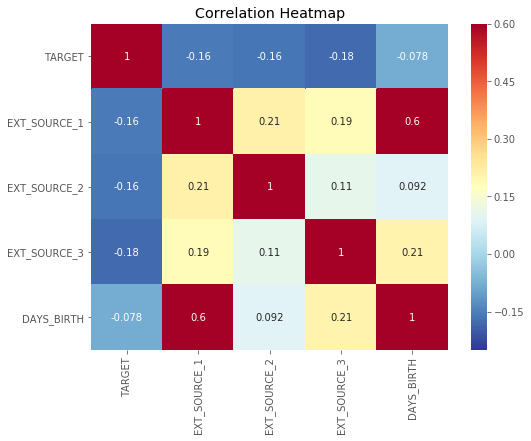

In [4]:
plt.figure(figsize = (8, 6))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(ext_data_corrs, 
            cmap = plt.cm.RdYlBu_r, 
            vmin = -0.25, 
            annot = True, 
            vmax = 0.6)
plt.title('Correlation Heatmap')

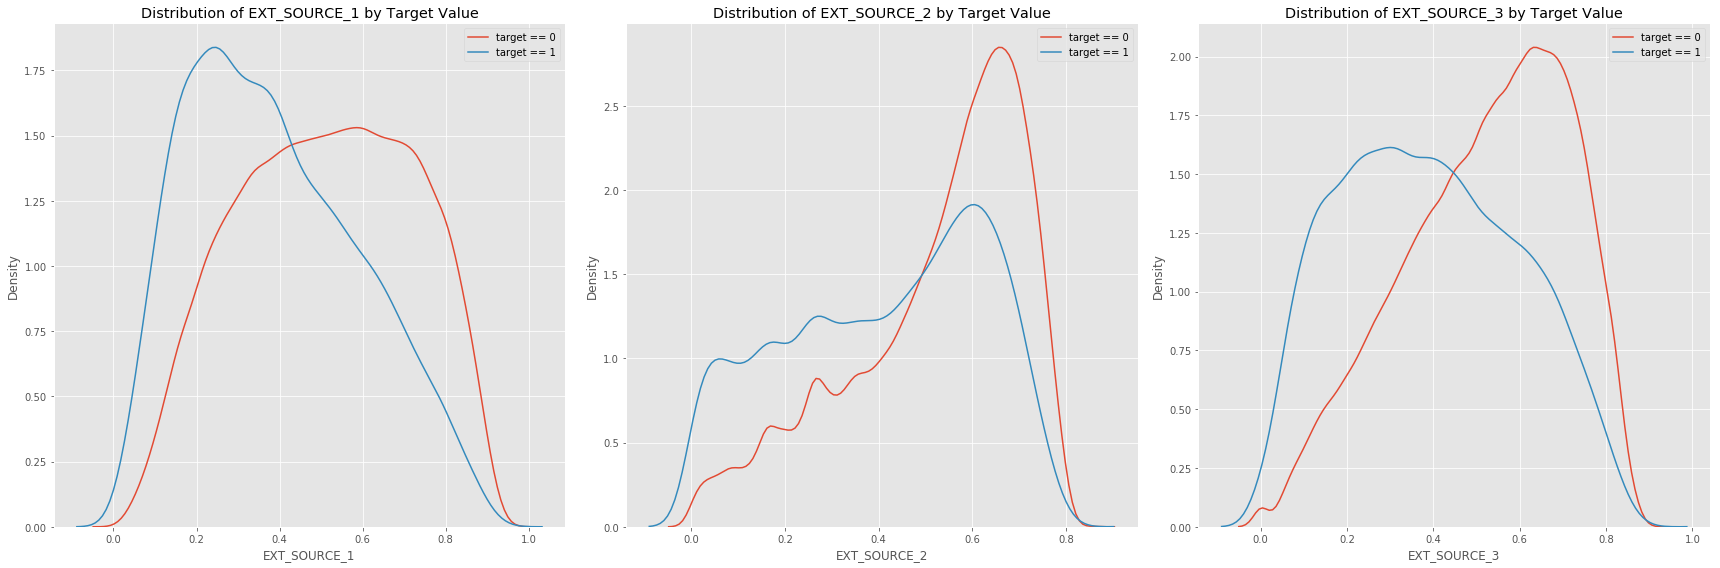

In [5]:
# 進一步我們檢查這三項變數在 Target 上的分布是否不同
plt.figure(figsize = (24, 8))

# 依不同 EXT_SOURCE 逐項繪製 KDE 圖形
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # 做 subplot
    plt.subplot(1, 3, i + 1)
    
    # KDE 圖形
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # 加上各式圖形標籤
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [6]:
# 轉成以年記齡後，將以日記齡丟掉
plot_data = ext_data.copy()
plot_data['YEARS_BIRTH'] = plot_data['DAYS_BIRTH'] / 365
# df.drop(["col"], axis = 1) 是 drop column
plot_data.drop(['DAYS_BIRTH'], axis = 1, inplace=True)

# 定義函數 : 計算兩個 column 之間的相關係數
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy = (.2, .8), xycoords = ax.transAxes,
                size = 20)

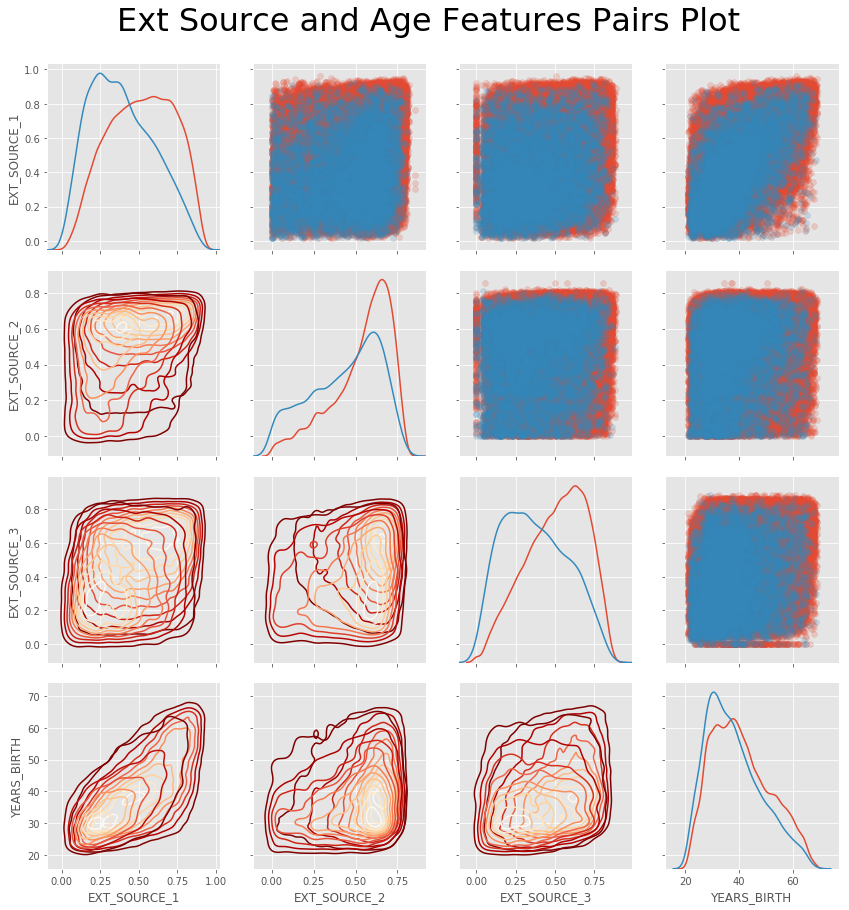

In [7]:
N_sample = 100000
# 把 NaN 數值刪去, 並限制資料上限為 100000 : 因為要畫點圖, 如果點太多，會畫很久!
plot_data = plot_data.dropna().sample(n = N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

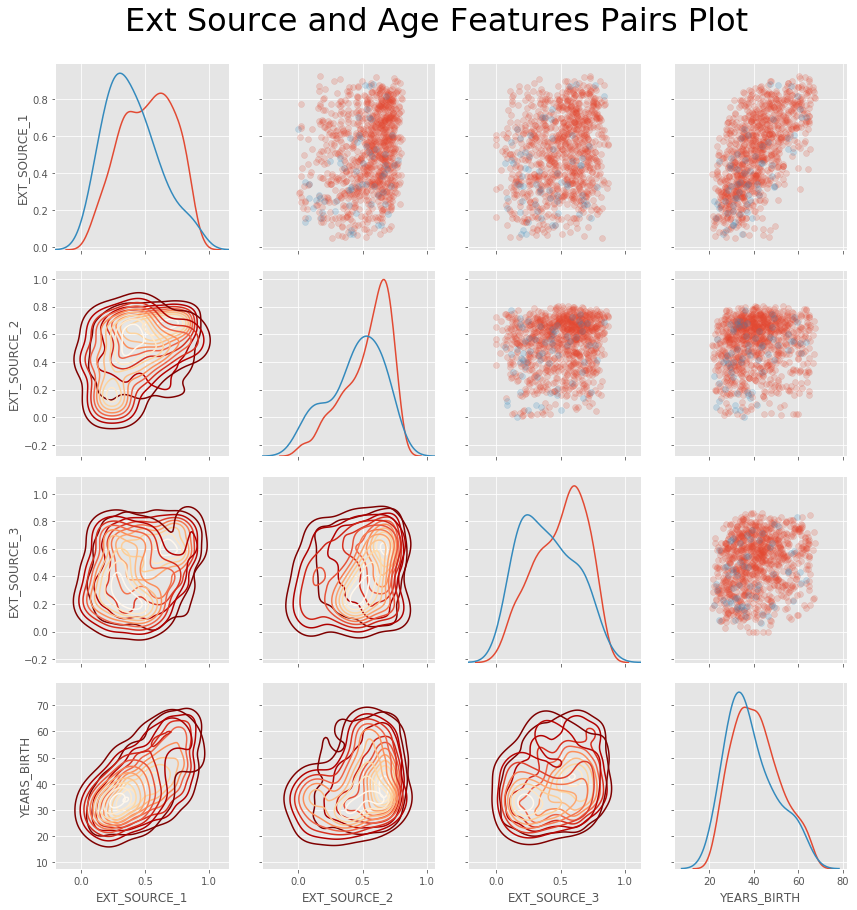

In [8]:
# 試著以不同 size 畫看看，觀察有那裡不太一樣
N_sample = 1000

plot_data = plot_data.dropna().sample(n = N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

## 作業

請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap

請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

## [作業目標]

試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

## [作業重點]

如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖

(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)

如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖

(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

## numpy.random.random

> numpy.random.random(size=None)

> Return random floats in the half-open interval [0.0, 1.0)


https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html

In [9]:
# 方法 1
matrix = np.random.uniform(-1,1, [10,10])

"""
numpy.random.random(size=None)
Return random floats in the half-open interval [0.0, 1.0).
"""
# 方法 2
matrix = np.random.random((10,10))*2-1 # *2-1的用意是把 [0.0, 1.0) 變成 [-1, 1)
matrix

array([[ 0.5658553 , -0.38633147, -0.57085622, -0.40624315,  0.59558542,
         0.85361451,  0.59943023,  0.91322169,  0.82626287, -0.08893257],
       [ 0.63483627, -0.00678424,  0.81962676, -0.67972857,  0.53880523,
         0.99843807, -0.98764279, -0.83211054,  0.33335026,  0.32780595],
       [ 0.92841075, -0.83604257, -0.63257646, -0.39638549, -0.88836017,
         0.29687005,  0.29137509, -0.47649812, -0.41879656, -0.80521242],
       [-0.60711242,  0.24637892, -0.80921777, -0.53910586, -0.29707021,
        -0.93512718,  0.17931229, -0.53547514, -0.59507095,  0.50647172],
       [ 0.92326982,  0.77871415,  0.34602418, -0.74147692, -0.82374241,
         0.9255904 ,  0.46081588,  0.36805568, -0.73691273,  0.77092966],
       [ 0.13678471, -0.82903204, -0.79316866,  0.08653163, -0.72851016,
        -0.39848409, -0.83746545, -0.43495359,  0.41711538,  0.68013767],
       [-0.65515197, -0.8052709 , -0.1164762 , -0.32782349, -0.14543587,
        -0.97076218, -0.14655368,  0.33972347

## 1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap

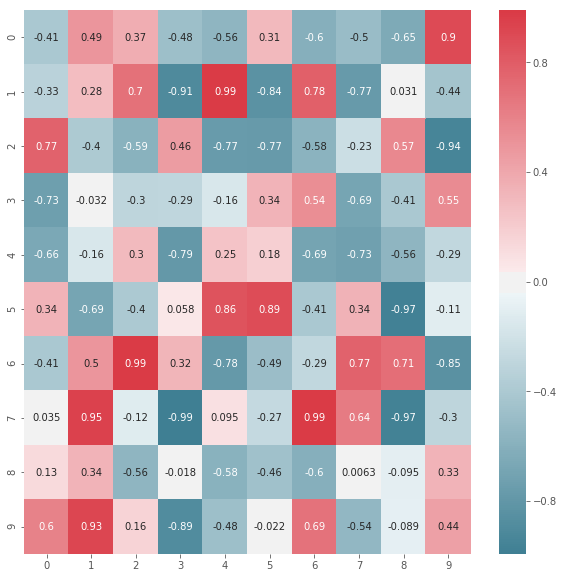

In [10]:
"""
Your Code Here
"""
matrix = np.random.random((10,10))*2-1 # *2-1的用意是把 [0.0, 1.0) 變成 [-1, 1)

plt.figure(figsize=(10,10))
"""
Your Code Here
"""

heatmap = sns.heatmap(matrix, annot = True, 
                      cmap = sns.diverging_palette(220, 10, as_cmap=True) ) #"YlGnBu",
                      # yticklabels = df_predict_cols, xticklabels = df_predict_cols

plt.show()

## 2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

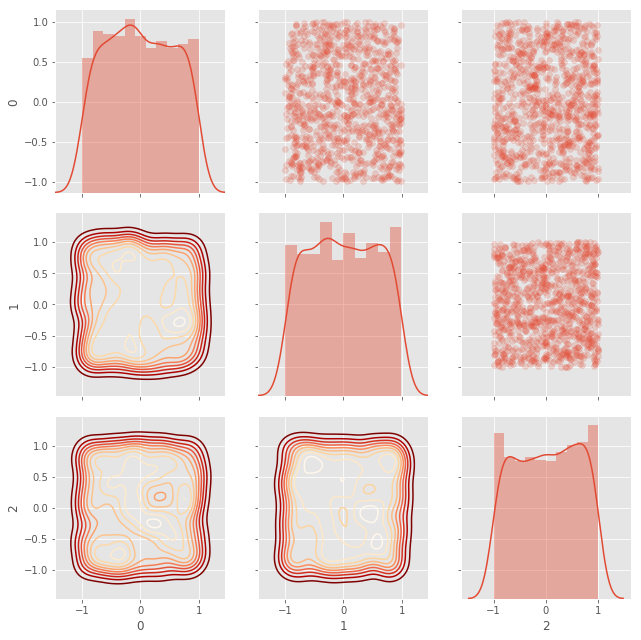

In [11]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = np.random.random((nrow, ncol))*2-1 # *2-1的用意是把 [0.0, 1.0) 變成 [-1, 1)

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0, 1, 2], size = nrow)
plot_data = pd.DataFrame(matrix, indice)

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey = False)
"""
Your Code Here
Please replace "..." to correct plot function
"""
# 上半部放 scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)
# 對角線畫 histogram
grid.map_diag(sns.distplot) # sns.kdeplot 是 density plot
# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

In [12]:
matrix

array([[-0.31403287, -0.18396069,  0.76333415],
       [ 0.88319972,  0.23510882,  0.62014059],
       [-0.95259363,  0.49192757,  0.80087719],
       ...,
       [-0.10772378,  0.13552163,  0.38573266],
       [-0.00185149,  0.44331416, -0.15931955],
       [-0.77462621, -0.20453903, -0.74610465]])

In [13]:
indice

array([2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0,
       1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 2,
       2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0,
       0, 0, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 2,
       2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 2,
       1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2,
       1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0,

In [14]:
plot_data.head() # column的0,1,2不是label的0,1,2，而是代表column 0, column 1, column 2

,0,1,2
2,-0.314033,-0.183961,0.763334
0,0.883200,0.235109,0.620141
1,-0.952594,0.491928,0.800877
0,-0.708852,-0.457040,0.361725
2,0.238747,-0.298622,-0.510556


## 3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

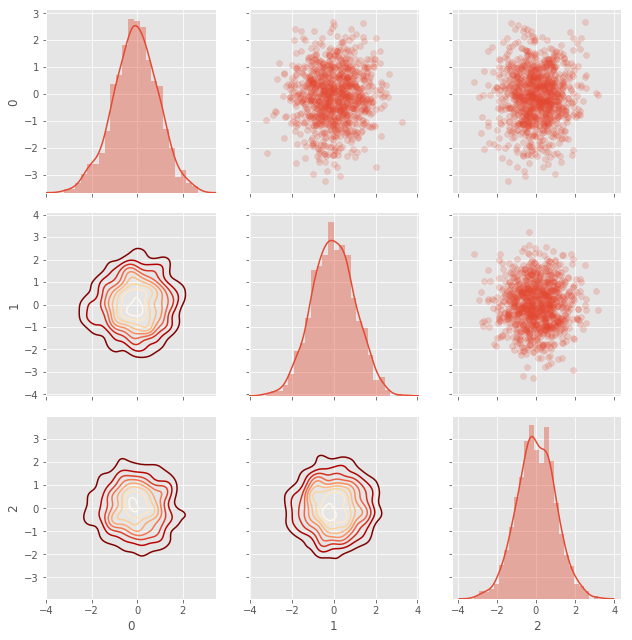

In [15]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = np.random.randn(nrow, ncol)

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0, 1, 2], size = nrow)
plot_data = pd.DataFrame(matrix, indice)

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False)
"""
Your Code Here
Please replace "..." to correct plot function
"""
# 上半部放 scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)
# 對角線畫 histogram
grid.map_diag(sns.distplot) # sns.kdeplot 是 density plot
# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

## 參考資料


## 課後補充:



## [Heatmap (matplotlib)](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html)

官方介紹 Heatmap 有哪些參數可變化與調整，提供同學做圖形參數調整參考

![image](https://lh3.googleusercontent.com/J2EUJUDQrcpWkuhFk-wlieA70mQqoVPaBsmvaq4YfhRvGoRbieWgb_pWaQB0ivOComu6-bqqHWi8bhxqGxNf1SA1bbjFksoZQ0HsYT-UMkmYIN5BZdDiaetDA9-RB0YfrqmI5k0TPHk?t=1556521565588)



## [進階 Heatmap (Seaborn)](https://www.jianshu.com/p/363bbf6ec335)

如果對於 matplotlib 的 Heatmap 不滿意．那麼不妨試試看 Seaborn 的進階版 Heatmap，同樣地，本連結僅供同學參考圖形範例並挑選對應程式，並不需要逐行讀完

![image](https://lh4.googleusercontent.com/9QGBeDbOmY383k-LBASSScwyIQ6LWeaoU4xr2uF2sA8PwnTdFM6l01Pxq-oG26yLze-5-aJZW7OYuwm7wdHnzxlmF49HkhvSW7ayYgkPG8ZP9PmjsaR9imlfMyL0RPjlW21kkT7LeVo?t=1556521581273)


## [Pairplot 的更多應用實例 (towardsdatascience)](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)

Seaborn 的 Pairplot 也能提供不少直覺，尤其是分類問題比回歸問題更為適用，如右圖，可以更容易看出該如何分類

![image](https://lh3.googleusercontent.com/_IYKgVJMml9FeSQ4Zm5yrQZ1nyX-QmcWJkkXi9eKdDD100W3gLkeDruCmjuiZMmg6Rwet2Nfvkl-j5qFA51WdyS95ULkuxwcu_xwbgDO_8SqmuqFBwgzIPYBHM9A5yg2TCmpx2Pf-1U?t=1556521591105)